In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

In [14]:
df = pd.read_csv('preprocessed_superstore_data.csv')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,3121,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,3122,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,3155,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2979,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,3072,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

# 모델 훈련
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)


# Validation 세트로 모델 평가
X_val_scaled = preprocessor.transform(X_val)
val_pred = lr.predict(X_val_scaled)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")


########
# Test 데이터 불러오기
test_data = pd.read_csv('test.csv')

# Test 데이터에서 Feature 변수 추출하기
X_test = test_data.drop(columns=['Response'])

# Test 데이터에서 타겟 변수 추출하기
y_test = test_data['Response']
X_test_scaled = preprocessor.transform(X_test)

# Test 데이터에서 예측하기
test_pred = lr.predict(X_test_scaled)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_test, test_pred)

# 결과 출력
print("################################")
print(report)

Validation Accuracy: 0.8615819209039548
Test Accuracy: 0.8642533936651584
################################
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       376
           1       0.59      0.29      0.39        66

    accuracy                           0.86       442
   macro avg       0.74      0.63      0.66       442
weighted avg       0.84      0.86      0.84       442



# 모델링해보기

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def evaluate_model(test_data, preprocessor, model):
    # Test 데이터에서 Feature 변수 추출하기
    X_test = test_data.drop(columns=['Response'])

    # Test 데이터에서 타겟 변수 추출하기
    y_test = test_data['Response']

    # Test 데이터 전처리
    X_test_scaled = preprocessor.transform(X_test)

    # Test 데이터에서 예측하기
    test_pred = model.predict(X_test_scaled)

    # Test 데이터에서 정확도 평가하기
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {test_accuracy}")

    # classification_report를 사용하여 분류 모델의 성능 평가하기
    report = classification_report(y_test, test_pred)
    
    # confusion matrix 그리기
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, test_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
    plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    labels = ['TN', 'FP', 'FN', 'TP']
    label_values = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]
    label_colors = ['black', 'black', 'black', 'black']
    indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

    for label, value, color, (i, j) in zip(labels, label_values, label_colors, indices):
        plt.text(j, i, f'{label}\n{value}', ha='center', va='center', color=color)

    plt.show()

    # ROC curve 그리기
    plt.figure(figsize=(8, 6))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return report


In [17]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# 모델 훈련
# KNN 모델 초기화
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Validation Accuracy: 0.8700564971751412
Test Accuracy: 0.8438914027149321


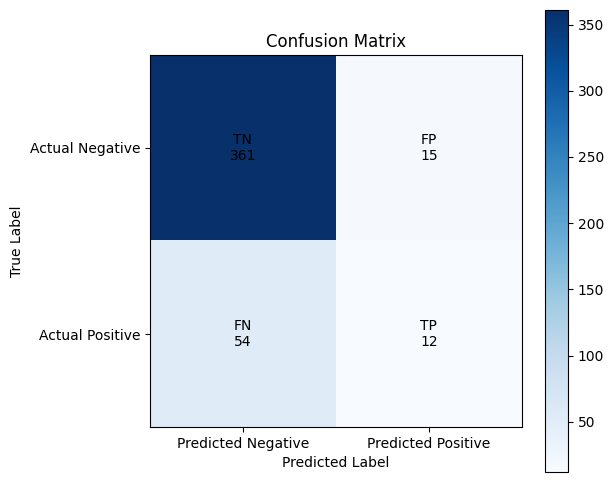

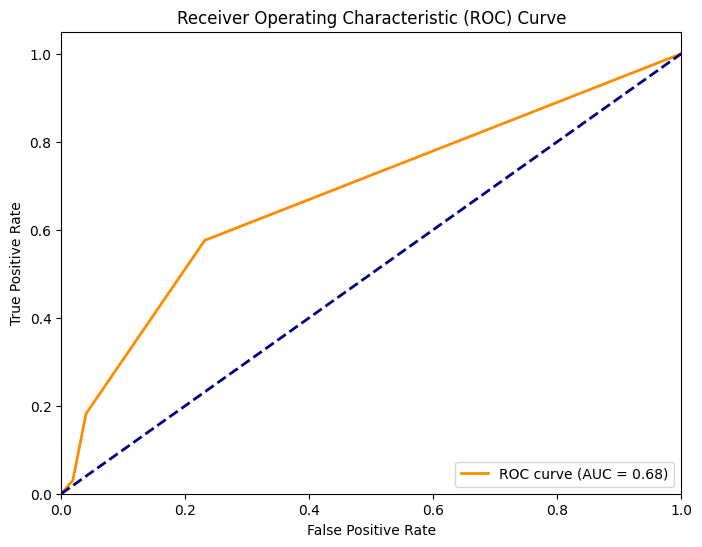

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       376
           1       0.44      0.18      0.26        66

    accuracy                           0.84       442
   macro avg       0.66      0.57      0.59       442
weighted avg       0.81      0.84      0.82       442



In [19]:
test_data = pd.read_csv('test.csv')

# Validation 세트로 모델 평가
X_val_scaled = preprocessor.transform(X_val)
val_pred = knn.predict(X_val_scaled)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

# test 데이터에 대한 성능 평가
test_report = evaluate_model(test_data, preprocessor, knn)
print(test_report)

# GridSearch를 해보자

In [20]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# KFold 교차검증 방법 수행

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=31)

#sf = StratifiedKFold(n_splits=5)

In [22]:
knn_params = {
    "n_neighbors": list(range(1, 31)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

## GridSearch로 최적의 하이퍼파라미터 탐색

In [23]:
# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=kf
)

clf_knn.fit(X_train_scaled, y_train)

best_model = clf_knn.best_estimator_
print(f"Best score of KNN: {clf_knn.best_score_}")
print(f"Best hiperparams of KNN: {best_model}")
#print(clf_knn.cv_results_)

Best score of KNN: 0.873959351427211
Best hiperparams of KNN: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')


In [24]:
# 최적 모델로 평가
X_val_scaled = preprocessor.transform(X_val)
val_pred = best_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.8700564971751412


## 최적 모델로 교차 검증 수행

In [25]:
##### 아래 3개의 블록들은 모두 같은 코드입니다. 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))


# 최적 모델로 평가
X_val_scaled = preprocessor.transform(X_val)
val_pred = clf_knn.predict(X_val_scaled)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

best_model = clf_knn.best_estimator_
val_pred = best_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Score :  0.873959351427211
Best Validation Score :  0.8700564971751412
Validation Accuracy: 0.8700564971751412
Validation Accuracy: 0.8700564971751412


In [26]:
# 교차검증 수행
scores_knn = cross_val_score(clf_knn.best_estimator_, X_train_scaled, y_train, cv=kf, scoring='accuracy')
scores_knn

array([0.86572438, 0.85159011, 0.89361702, 0.87943262, 0.87943262])

In [27]:
# 교차검증 수행
scores_knn = cross_val_score(clf_knn, X_train_scaled, y_train, cv=kf, scoring='accuracy')
scores_knn

array([0.84805654, 0.8409894 , 0.86879433, 0.87943262, 0.87234043])

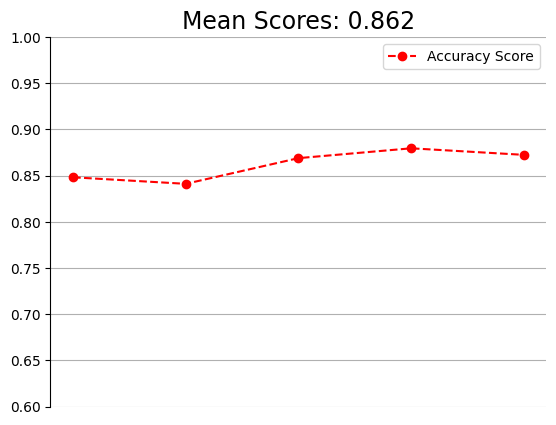

In [28]:
import numpy as np
fig, ax = plt.subplots()

ax.plot(scores_knn, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_knn):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

Test Accuracy: 0.8484162895927602


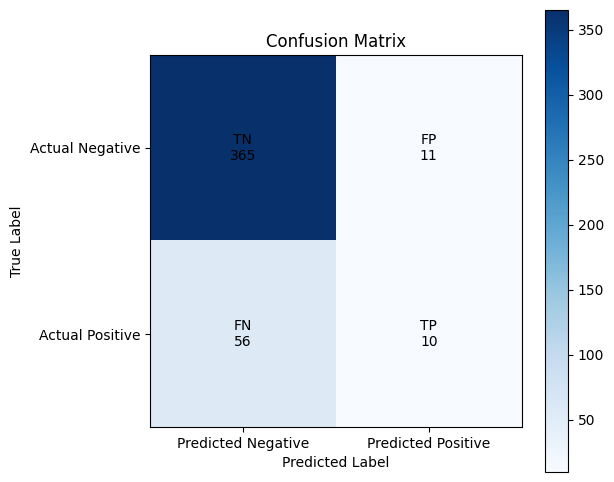

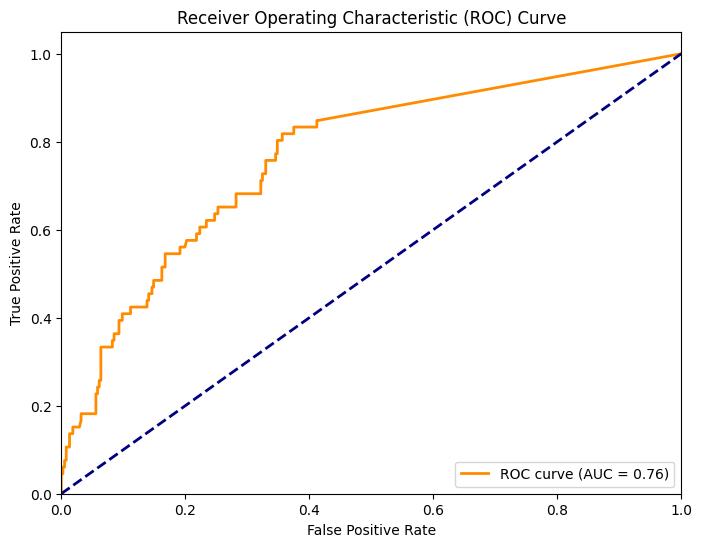

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       376
           1       0.48      0.15      0.23        66

    accuracy                           0.85       442
   macro avg       0.67      0.56      0.57       442
weighted avg       0.81      0.85      0.81       442



In [29]:
# test 데이터에 대한 성능 평가
test_report = evaluate_model(test_data, preprocessor, best_model)
print(test_report)

# 스케일링 방법 비교

In [30]:
"""scaling_result_df = pd.DataFrame({
    'Categorical Scaling' : [], 
    'Numeric Scaling' : [], 
    'Best Parameters' : [], 
    'Best Score' : [], 
    'Validation Accuracy' : [] 
})"""

scaling_result_df = pd.DataFrame(columns=['Categorical Scaling', 
                                          'Numeric Scaling', 
                                          'Best Parameters', 
                                          'Best Score', 
                                          'Validation Accuracy'])
scaling_result_df

,Categorical Scaling,Numeric Scaling,Best Parameters,Best Score,Validation Accuracy


In [31]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

knn_params = {
    "n_neighbors": list(range(1, 31)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=3
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))


# 데이터 프레임에 결과값 저장
scaling_result_df.loc[0] = ['OneHotEncoder', 'StandardScaler', clf_knn.best_params_, clf_knn.best_score_, clf_knn.score(X_val_scaled, y_val)]


Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
Best Score :  0.868270316664408
Best Validation Score :  0.864406779661017


In [32]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', MinMaxScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

knn_params = {
    "n_neighbors": list(range(1, 31)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=3
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

scaling_result_df.loc[1] = ['OneHotEncoder', 'MinMaxScaler', clf_knn.best_params_, clf_knn.best_score_, clf_knn.score(X_val_scaled, y_val)]


Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Score :  0.867561096806252
Best Validation Score :  0.8559322033898306


In [33]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# LabelEncoder를 각 범주형 변수에 대해 개별적으로 적용
X_train_encoded = X_train[categorical_cols].apply(LabelEncoder().fit_transform)

# LabelEncoder를 적용한 범주형 변수와 수치형 변수를 결합
X_train_final = pd.concat([X_train_encoded, X_train[numeric_cols]], axis=1)

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_cols)
])

# 전처리 파이프라인 적용
X_train_scaled = preprocessor.fit_transform(X_train_final)

knn_params = {
    "n_neighbors": list(range(1, 31)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=3
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
# 훈련된 LabelEncoder를 사용하여 검증 데이터에 변환 적용
X_val_encoded = X_val[categorical_cols].apply(LabelEncoder().fit_transform)
X_val_final = pd.concat([X_val_encoded, X_val[numeric_cols]], axis=1)
X_val_scaled = preprocessor.transform(X_val_final)

print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

scaling_result_df.loc[2] = ['LabelEncoder', 'StandardScaler', clf_knn.best_params_, clf_knn.best_score_, clf_knn.score(X_val_scaled, y_val)]

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Score :  0.8682793513122826
Best Validation Score :  0.884180790960452


In [34]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# LabelEncoder를 각 범주형 변수에 대해 개별적으로 적용
X_train_encoded = X_train[categorical_cols].apply(LabelEncoder().fit_transform)

# LabelEncoder를 적용한 범주형 변수와 수치형 변수를 결합
X_train_final = pd.concat([X_train_encoded, X_train[numeric_cols]], axis=1)

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), numeric_cols)
])

# 전처리 파이프라인 적용
X_train_scaled = preprocessor.fit_transform(X_train_final)

knn_params = {
    "n_neighbors": list(range(1, 31)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=3
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
# 훈련된 LabelEncoder를 사용하여 검증 데이터에 변환 적용
X_val_encoded = X_val[categorical_cols].apply(LabelEncoder().fit_transform)
X_val_final = pd.concat([X_val_encoded, X_val[numeric_cols]], axis=1)
X_val_scaled = preprocessor.transform(X_val_final)

print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

scaling_result_df.loc[3] = ['LabelEncoder', 'MinMaxScaler', clf_knn.best_params_, clf_knn.best_score_, clf_knn.score(X_val_scaled, y_val)]

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score :  0.8704039993374592
Best Validation Score :  0.8757062146892656


In [35]:
scaling_result_df

,Categorical Scaling,Numeric Scaling,Best Parameters,Best Score,Validation Accuracy
0,OneHotEncoder,StandardScaler,"{'metric': 'manhattan', 'n_neighbors': 23, 'we...",0.868270,0.864407
1,OneHotEncoder,MinMaxScaler,"{'metric': 'manhattan', 'n_neighbors': 16, 'we...",0.867561,0.855932
2,LabelEncoder,StandardScaler,"{'metric': 'manhattan', 'n_neighbors': 11, 'we...",0.868279,0.884181
3,LabelEncoder,MinMaxScaler,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.870404,0.875706


# 스케일링 방식 + 단순 CV 적용 -> 최적의 K및 최고 정확도 찾기

[0.8279043052642093, 0.8533962641094796, 0.854125461991809, 0.8633403256417941, 0.8654480071920888, 0.8562431325541905, 0.8612026770552393, 0.8583707921286585, 0.8611976825491959, 0.8576515832584157, 0.8612026770552392, 0.8569623414244332, 0.8583757866347017, 0.8562531215662771, 0.8583807811407451, 0.8562531215662771, 0.8562531215662771, 0.8548296873439216, 0.8562481270602337, 0.8541204674857656, 0.8576565777644591, 0.8541204674857656, 0.8569523524123465, 0.8548246928378784, 0.8548246928378784, 0.8548246928378784, 0.8548246928378784, 0.8527020277694536, 0.8534062531215664, 0.8519928079112976, 0.8541154729797225, 0.8512785935470983, 0.8534062531215664, 0.8512735990410549, 0.8519828188992109, 0.8512735990410549, 0.852692038757367, 0.8505743681949856, 0.852692038757367, 0.8512735990410549, 0.8512785935470983, 0.8505693736889421, 0.8505693736889421, 0.8505743681949856, 0.8505743681949856, 0.8505743681949856, 0.8505743681949856, 0.8505743681949856, 0.8505743681949856]
best K :  5
best Accur

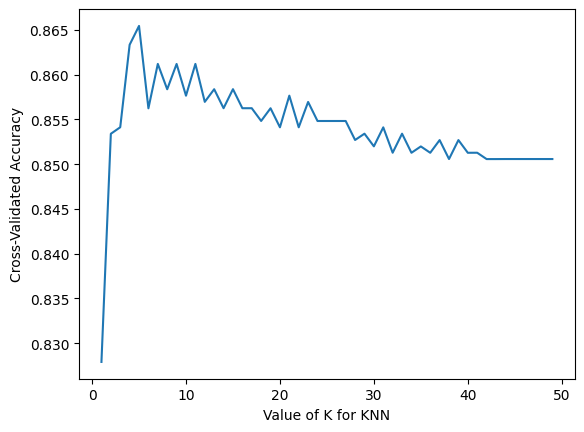

In [36]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

k_range = range(1,50)              # k를 1~50까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 

print(k_score)
print("best K : ", k_score.index(max(k_score))+1)
print("best Accuracy : ", max(k_score))
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

[0.8342623114573969, 0.8541204674857656, 0.8505643791828987, 0.8512935770652282, 0.8449006093297374, 0.8519928079112976, 0.8520027969233842, 0.8541254619918088, 0.8562531215662771, 0.8548346818499649, 0.8562481270602337, 0.8548296873439216, 0.8555339126960343, 0.8555389072020778, 0.8569523524123465, 0.8562481270602339, 0.8576565777644591, 0.8541204674857656, 0.8562431325541905, 0.8527020277694536, 0.854819698331835, 0.8519878134052543, 0.8519878134052543, 0.8512835880531415, 0.8512785935470983, 0.8505743681949856, 0.8512835880531415, 0.8505743681949856, 0.8512835880531415, 0.8505743681949856, 0.8505743681949856, 0.8505743681949856, 0.8505743681949856, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8505743681949856, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296, 0.8498651483368296]
best K :  17
best Ac

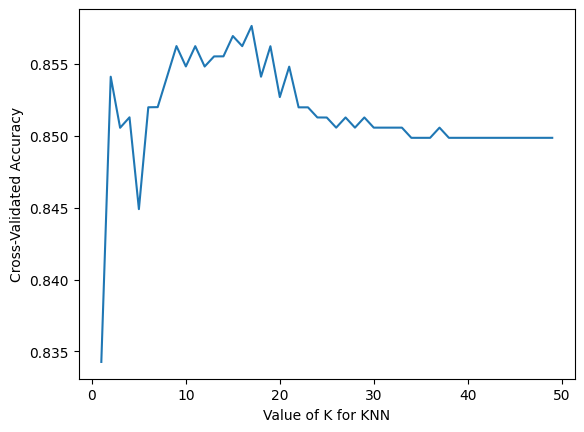

In [37]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', MinMaxScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

k_range = range(1,50)              # k를 1~50까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 

print(k_score)
print("best K : ", k_score.index(max(k_score))+1)
print("best Accuracy : ", max(k_score))
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

[0.8307511737089202, 0.8463340325641793, 0.8498751373489162, 0.852692038757367, 0.8583608031165719, 0.856947357906303, 0.8576665667765457, 0.8562481270602337, 0.86048846269104, 0.8562531215662771, 0.8562631105783638, 0.8498751373489162, 0.8569673359304766, 0.852707022275497, 0.8569573469183898, 0.8555389072020777, 0.8590700229747277, 0.8534062531215664, 0.8590650284686845, 0.855528918189991, 0.8562331435421037, 0.8555239236839476, 0.8569423634002596, 0.8562431325541905, 0.8569423634002596, 0.853401258615523, 0.8541154729797225, 0.8534062531215664, 0.8541154729797225, 0.8541154729797225, 0.8541154729797225, 0.8534062531215664, 0.8541154729797225, 0.8526970332634104, 0.8526970332634104, 0.852692038757367, 0.852692038757367, 0.8519878134052543, 0.852692038757367, 0.8512785935470981, 0.8519828188992109, 0.8512785935470981, 0.8512785935470981, 0.8505693736889421, 0.8505693736889421, 0.8498651483368296, 0.8512785935470981, 0.8505743681949856, 0.8512785935470981]
best K :  9
best Accuracy :  

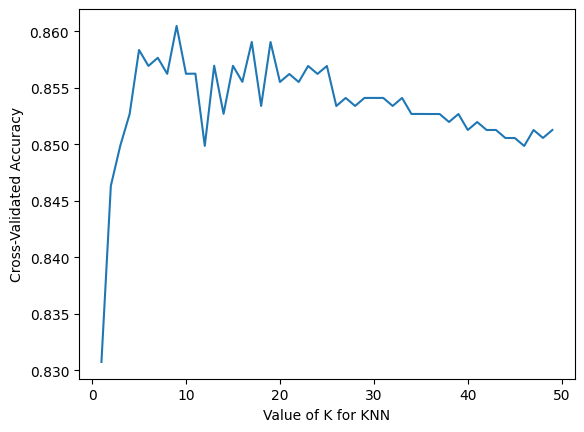

In [38]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# LabelEncoder를 각 범주형 변수에 대해 개별적으로 적용
X_train_encoded = X_train[categorical_cols].apply(LabelEncoder().fit_transform)

# LabelEncoder를 적용한 범주형 변수와 수치형 변수를 결합
X_train_final = pd.concat([X_train_encoded, X_train[numeric_cols]], axis=1)

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_cols)
])

# 전처리 파이프라인 적용
X_train_scaled = preprocessor.fit_transform(X_train_final)

k_range = range(1,50)              # k를 1~50까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 

print(k_score)
print("best K : ", k_score.index(max(k_score))+1)
print("best Accuracy : ", max(k_score))
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

[0.8321496354010588, 0.8420737189092, 0.841379482569174, 0.8491709119968036, 0.8449305763659976, 0.8541204674857656, 0.8505843572070722, 0.8562431325541905, 0.8562481270602337, 0.854125461991809, 0.8569523524123465, 0.8548296873439216, 0.853401258615523, 0.8519928079112976, 0.855528918189991, 0.854110478473679, 0.8548246928378782, 0.8541154729797222, 0.8569523524123464, 0.8562381380481471, 0.8576515832584157, 0.856947357906303, 0.8562381380481471, 0.8562381380481471, 0.8555339126960344, 0.8569523524123465, 0.8583608031165719, 0.856947357906303, 0.856947357906303, 0.8555389072020777, 0.857666566776546, 0.8583757866347019, 0.8590800119868145, 0.8590800119868145, 0.8597892318449706, 0.8569573469183898, 0.857666566776546, 0.8576665667765457, 0.8569573469183899, 0.8562481270602339, 0.8569523524123465, 0.8534062531215663, 0.8562431325541905, 0.8519878134052543, 0.854110478473679, 0.853401258615523, 0.8541054839676356, 0.8519828188992109, 0.8541054839676356]
best K :  35
best Accuracy :  0.85

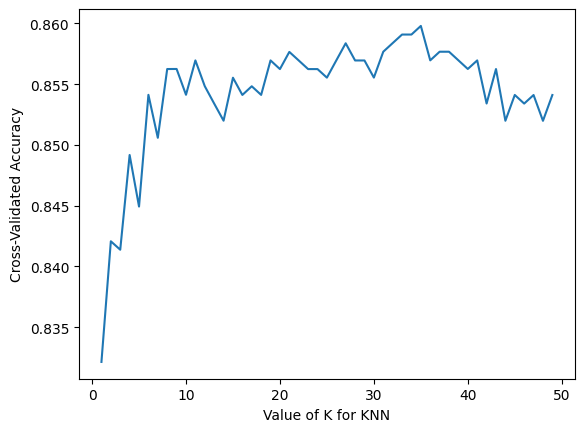

In [39]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# LabelEncoder를 각 범주형 변수에 대해 개별적으로 적용
X_train_encoded = X_train[categorical_cols].apply(LabelEncoder().fit_transform)

# LabelEncoder를 적용한 범주형 변수와 수치형 변수를 결합
X_train_final = pd.concat([X_train_encoded, X_train[numeric_cols]], axis=1)

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), numeric_cols)
])

# 전처리 파이프라인 적용
X_train_scaled = preprocessor.fit_transform(X_train_final)

k_range = range(1,50)              # k를 1~50까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 

print(k_score)
print("best K : ", k_score.index(max(k_score))+1)
print("best Accuracy : ", max(k_score))
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# GridSearch & Cv

In [103]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

knn_params = {
    "n_neighbors": list(range(1, 50)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=10
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

# Test 데이터에서 예측하기
test_pred = clf_knn.predict(X_val_scaled)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_val, test_pred)
print(f"Validation Accuracy: {test_accuracy}")

from sklearn.metrics import f1_score
f1 = f1_score(y_val, test_pred)
print(f"Validation f1_score: {f1}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_val, test_pred)
print(report)

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score :  0.8711217660573369
Best Validation Score :  0.8813559322033898
Validation Accuracy: 0.8813559322033898
Validation f1_score: 0.46153846153846156
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       301
           1       0.72      0.34      0.46        53

    accuracy                           0.88       354
   macro avg       0.81      0.66      0.70       354
weighted avg       0.87      0.88      0.86       354



Test Accuracy: 0.8438914027149321


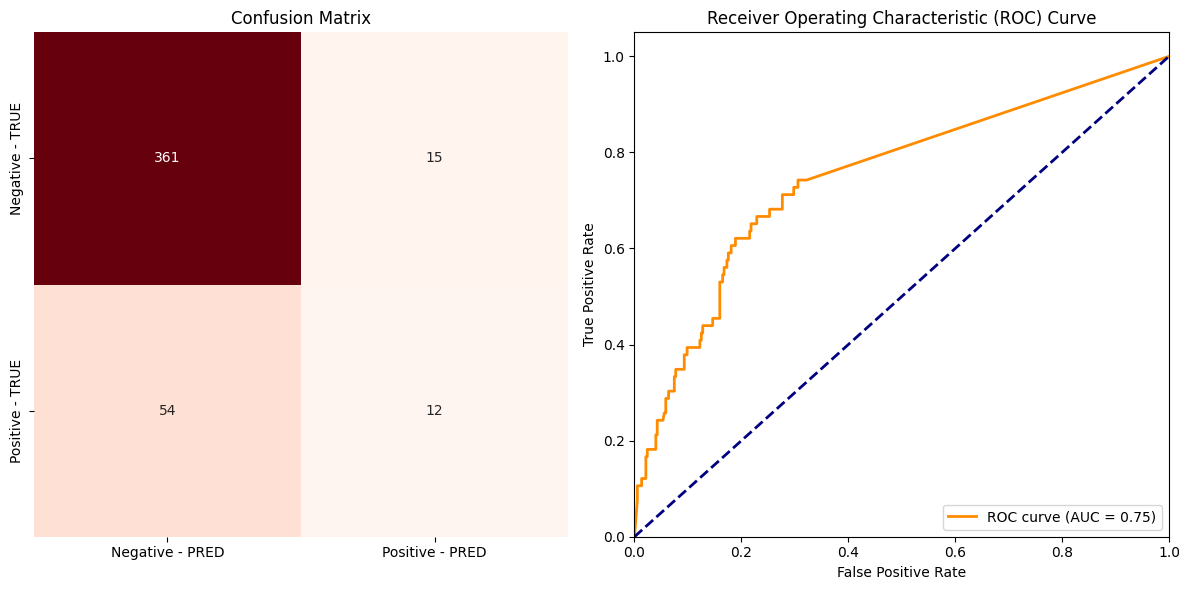

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       376
           1       0.44      0.18      0.26        66

    accuracy                           0.84       442
   macro avg       0.66      0.57      0.59       442
weighted avg       0.81      0.84      0.82       442



In [104]:
# test 데이터에 대한 성능 평가
test_report = evaluate_model(test_data, preprocessor, clf_knn)
print(test_report)

In [41]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

knn_params = {
    "n_neighbors": list(range(1, 50)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

kf = KFold(n_splits=5, shuffle=True)

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=kf
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Score :  0.8767636518557502
Best Validation Score :  0.8700564971751412


In [42]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

knn_params = {
    "n_neighbors": list(range(1, 50)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

sf = StratifiedKFold(n_splits=5)

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=sf
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Best Score :  0.8682630378668271
Best Validation Score :  0.864406779661017


In [107]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_train_scaled = preprocessor.fit_transform(X_train)

knn_params = {
    "n_neighbors": list(range(1, 50)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='f1',
    cv=10
)

clf_knn.fit(X_train_scaled, y_train)

##### 성능 평가 
X_val_scaled = preprocessor.transform(X_val)
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_scaled, y_val))

# Test 데이터에서 예측하기
test_pred = clf_knn.predict(X_val_scaled)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_val, test_pred)
print(f"Validation Accuracy: {test_accuracy}")

from sklearn.metrics import f1_score
f1 = f1_score(y_val, test_pred)
print(f"Validation f1_score: {f1}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_val, test_pred)
print(report)

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score :  0.4102753453898001
Best Validation Score :  0.3950617283950617
Validation Accuracy: 0.8615819209039548
Validation f1_score: 0.3950617283950617
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       301
           1       0.57      0.30      0.40        53

    accuracy                           0.86       354
   macro avg       0.73      0.63      0.66       354
weighted avg       0.84      0.86      0.84       354



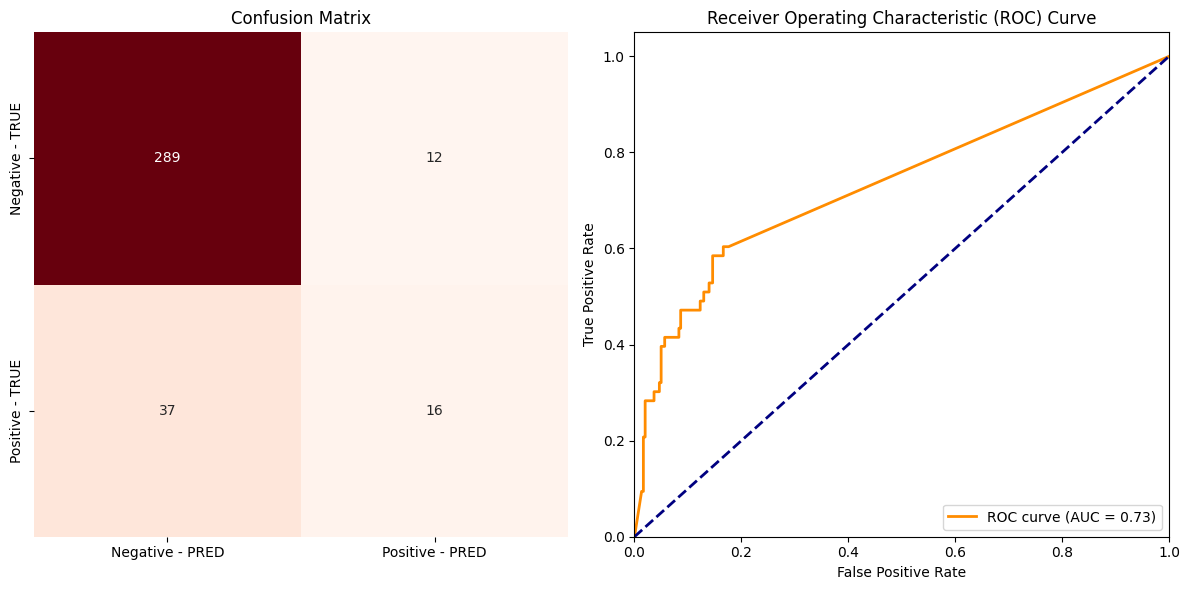

In [110]:
# confusion matrix 그리기
cm = confusion_matrix(y_val, test_pred)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix
sns.heatmap(cm, ax=axes[0], cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])
axes[0].set_title('Confusion Matrix')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, clf_knn.predict_proba(X_val_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Test Accuracy: 0.8484162895927602


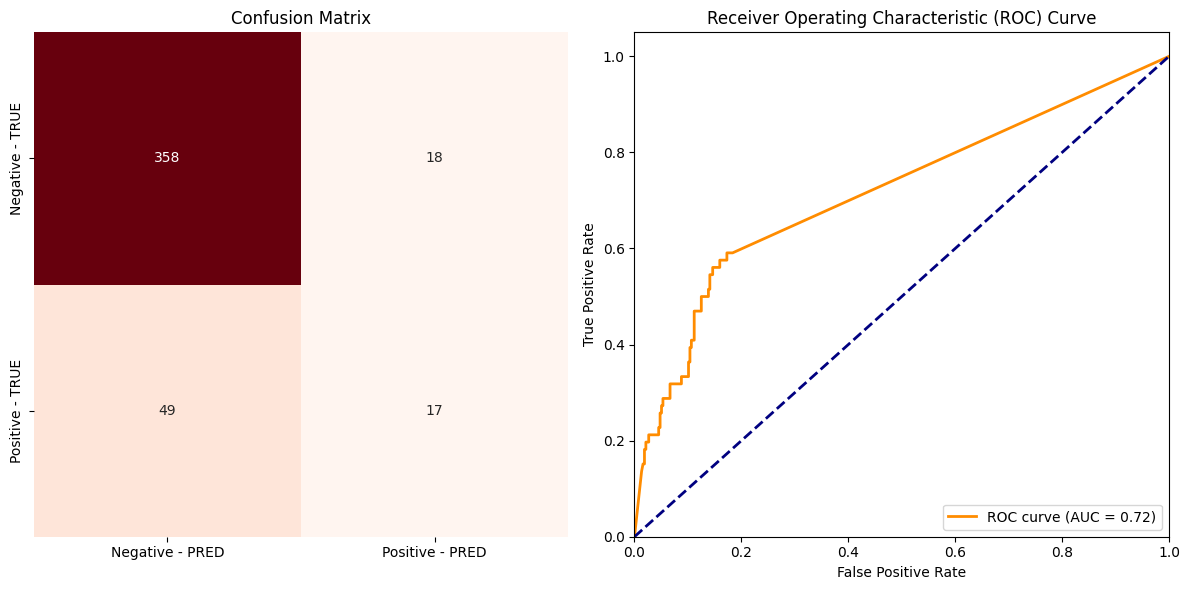

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       376
           1       0.49      0.26      0.34        66

    accuracy                           0.85       442
   macro avg       0.68      0.60      0.63       442
weighted avg       0.82      0.85      0.83       442



In [109]:
# test 데이터에 대한 성능 평가
test_data = pd.read_csv('test.csv')
test_report = evaluate_model(test_data, preprocessor, clf_knn)
print(test_report)

# 샘플링 기법 변환

## RandomOverSampler 진행

In [45]:
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

from imblearn.over_sampling import RandomOverSampler

# 데이터를 train_test_split하기 전에 샘플링 적용
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(train_data.drop(columns=['Response']), train_data['Response'])
X_resampled.shape, y_resampled.shape

((3002, 20), (3002,))

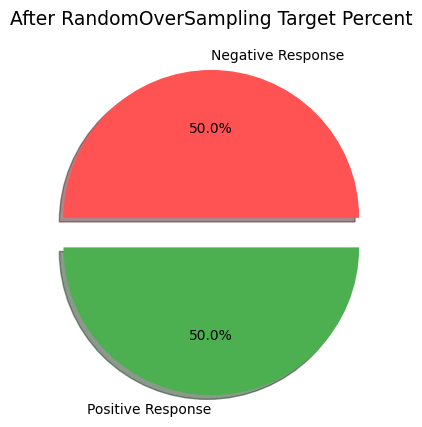

In [54]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('After RandomOverSampling Target Percent', fontsize=13.5)

plt.show()

In [97]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
train_data = pd.read_csv('train.csv')

# Train과 Validation 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 오버샘플링 적용
ros = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train_resampled.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

# Train 데이터를 전처리
X_train_processed = preprocessor.fit_transform(X_train_resampled)

# Validation 데이터를 전처리
X_val_processed = preprocessor.transform(X_val)

knn_params = {
    "n_neighbors": list(range(1, 50)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=10
)

# GridSearchCV를 이용한 모델 학습
clf_knn.fit(X_train_processed, y_train_resampled)

##### 성능 평가 
# 검증 데이터에 대한 전처리

print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_processed, y_val))

# Test 데이터에서 예측하기
test_pred = clf_knn.predict(X_val_processed)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_val, test_pred)
print(f"Validation Accuracy: {test_accuracy}")

from sklearn.metrics import f1_score
f1 = f1_score(y_val, test_pred)
print(f"Validation f1_score: {f1}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_val, test_pred)
print(report)


Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score :  0.9575000000000001
Best Validation Score :  0.847457627118644
Validation Accuracy: 0.847457627118644
Validation f1_score: 0.46
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       301
           1       0.49      0.43      0.46        53

    accuracy                           0.85       354
   macro avg       0.70      0.68      0.69       354
weighted avg       0.84      0.85      0.84       354



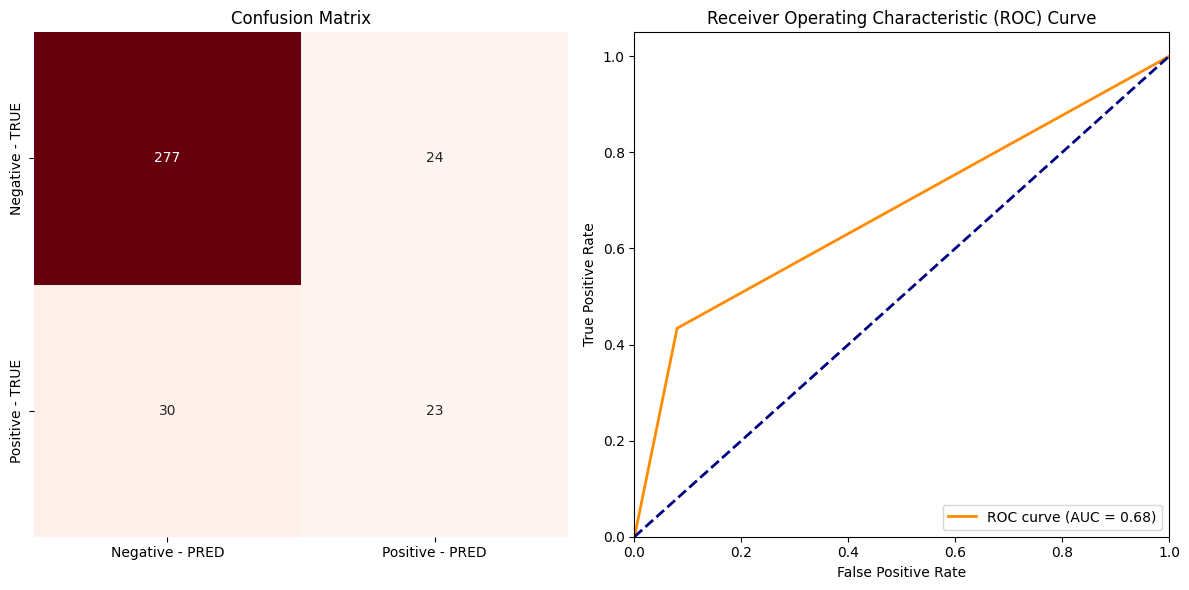

In [98]:
# confusion matrix 그리기
cm = confusion_matrix(y_val, test_pred)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix
sns.heatmap(cm, ax=axes[0], cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])
axes[0].set_title('Confusion Matrix')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, clf_knn.predict_proba(X_val_processed)[:, 1])
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [92]:
y_train_resampled.value_counts()

Response
0    1200
1    1200
Name: count, dtype: int64

Test Accuracy: 0.8212669683257918


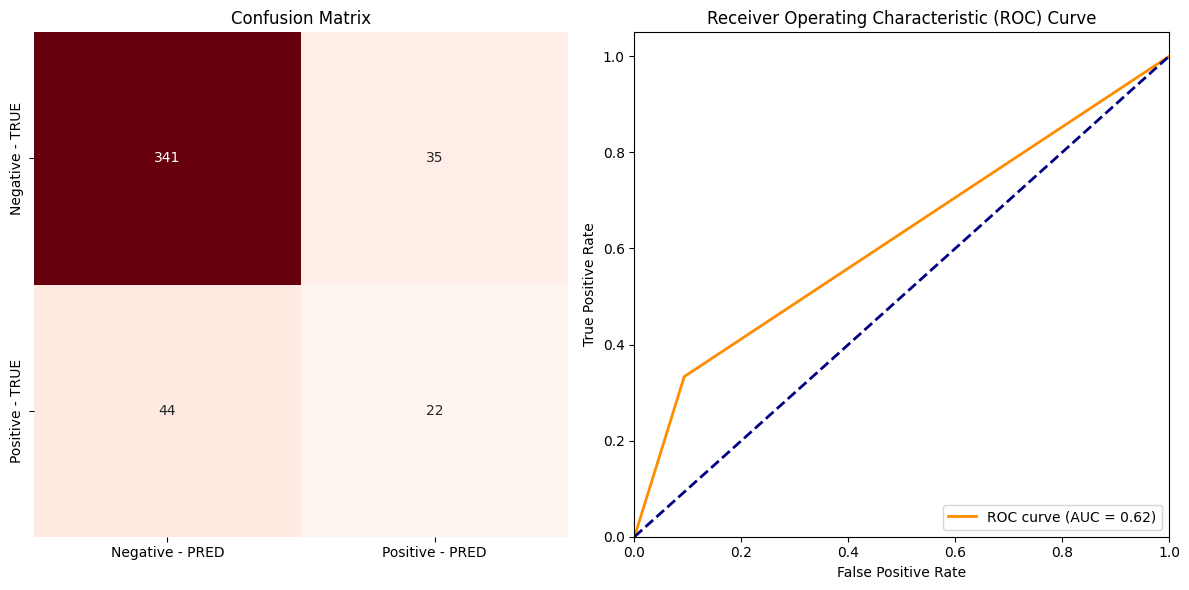

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       376
           1       0.39      0.33      0.36        66

    accuracy                           0.82       442
   macro avg       0.64      0.62      0.63       442
weighted avg       0.81      0.82      0.82       442



In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def evaluate_model(test_data, preprocessor, model):
    # Test 데이터에서 Feature 변수 추출하기
    X_test = test_data.drop(columns=['Response'])

    # Test 데이터에서 타겟 변수 추출하기
    y_test = test_data['Response']

    # Test 데이터 전처리
    X_test_scaled = preprocessor.transform(X_test)

    # Test 데이터에서 예측하기
    test_pred = model.predict(X_test_scaled)

    # Test 데이터에서 정확도 평가하기
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {test_accuracy}")

    # classification_report를 사용하여 분류 모델의 성능 평가하기
    report = classification_report(y_test, test_pred)
    
    # confusion matrix 그리기
    cm = confusion_matrix(y_test, test_pred)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Confusion matrix
    sns.heatmap(cm, ax=axes[0], cmap='Reds', annot=True, fmt='g', cbar=False,
                xticklabels=['Negative - PRED', 'Positive - PRED'],
                yticklabels=['Negative - TRUE', 'Positive - TRUE'])
    axes[0].set_title('Confusion Matrix')

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return report


# test 데이터에 대한 성능 평가
test_report = evaluate_model(test_data, preprocessor, clf_knn)
print(test_report)

## SMOTE 진행

In [100]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')

# Train과 Validation 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

# Train 데이터를 전처리
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# SMOTE 샘플링 적용
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)


knn_params = {
    "n_neighbors": list(range(1, 50)),
    "weights": ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# knn_params의 하이퍼 파라미터를 5개의 train, validation set fold로 나누어 테스트 수행 설정
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=10
)

# GridSearchCV를 이용한 모델 학습
clf_knn.fit(X_train_resampled, y_train_resampled)

##### 성능 평가 
# Test 데이터에서 예측하기
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score : ", clf_knn.best_score_)
# 최적 모델을 사용해 검증 데이터에 대한 정확도 계산
print("Best Validation Score : ", clf_knn.score(X_val_processed, y_val))

test_pred = clf_knn.predict(X_val_processed)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_val, test_pred)
print(f"Validation Accuracy: {test_accuracy}")

# F1-score 평가하기
f1 = f1_score(y_val, test_pred)
print(f"Validation f1_score: {f1}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_val, test_pred)
print(report)


Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Best Score :  0.95
Best Validation Score :  0.8418079096045198
Validation Accuracy: 0.8418079096045198
Validation f1_score: 0.46153846153846156
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       301
           1       0.47      0.45      0.46        53

    accuracy                           0.84       354
   macro avg       0.69      0.68      0.68       354
weighted avg       0.84      0.84      0.84       354



In [95]:
y_train_resampled.value_counts()

Response
0    1200
1    1200
Name: count, dtype: int64

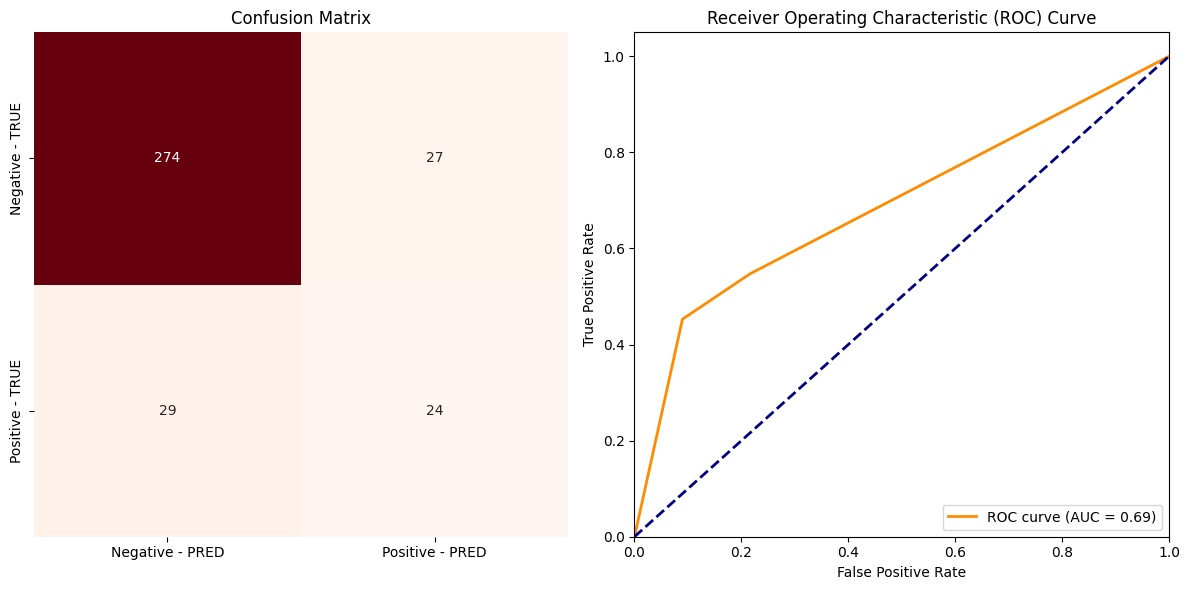

In [101]:
# confusion matrix 그리기
cm = confusion_matrix(y_val, test_pred)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix
sns.heatmap(cm, ax=axes[0], cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])
axes[0].set_title('Confusion Matrix')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, clf_knn.predict_proba(X_val_processed)[:, 1])
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Test Accuracy: 0.8190045248868778


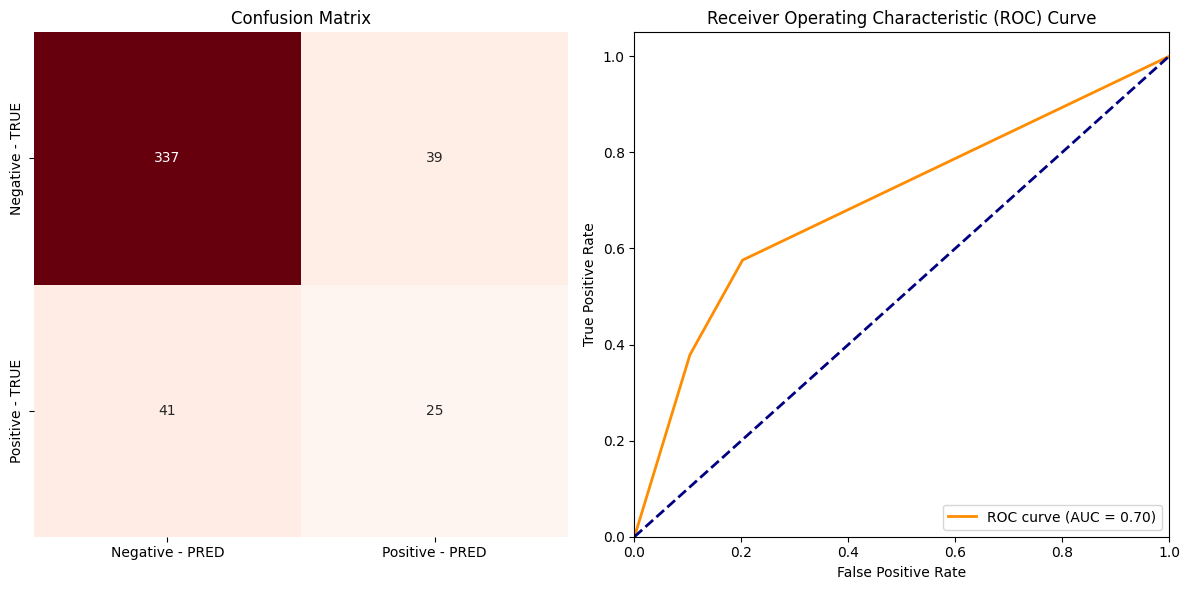

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       376
           1       0.39      0.38      0.38        66

    accuracy                           0.82       442
   macro avg       0.64      0.64      0.64       442
weighted avg       0.82      0.82      0.82       442



In [102]:
# test 데이터에 대한 성능 평가
test_report = evaluate_model(test_data, preprocessor, clf_knn)
print(test_report)

# PCA

In [76]:
from sklearn.decomposition import PCA
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')
X = train_data.drop(columns=['Response'])
y = train_data['Response']
"""# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)"""

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_scaled = preprocessor.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 2.60799005, -1.05186603, -0.6049703 ],
       [ 0.29984641,  1.91546529, -0.79083643],
       [ 0.56970359,  0.79530509, -2.09061938],
       ...,
       [ 4.39741836, -1.60137493, -1.30256863],
       [ 0.90312668, -0.45481608,  1.49411761],
       [ 3.52771952, -1.11385946, -0.33774439]])

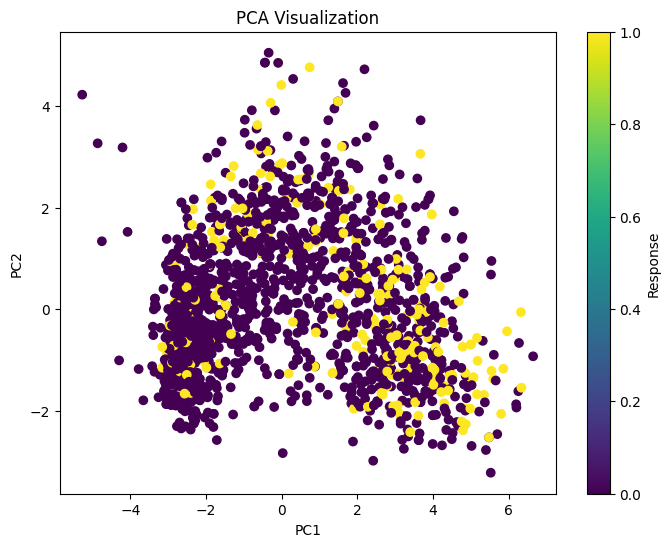

In [77]:
import matplotlib.pyplot as plt

# 주성분들의 값에 따라 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.colorbar(label='Response')
plt.show()

## 최적의 주성분 개수 찾기 과정

In [78]:
from sklearn.decomposition import PCA
# Train 데이터 불러오기
train_data = pd.read_csv('train.csv')
X = train_data.drop(columns=['Response'])
y = train_data['Response']
"""# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']), 
                                                  train_data['Response'], 
                                                  test_size=0.2, 
                                                  stratify=train_data['Response'], 
                                                  random_state=31)"""

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

X_scaled = preprocessor.fit_transform(X)

In [87]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=X_pca)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9
0,2.608004,-1.050306,-0.605466,-0.199195,0.076150,1.331840,2.573032,-0.669463,-1.976505,0.194931
1,0.299846,1.915446,-0.789797,0.901139,-0.598150,0.489783,-0.836080,-1.036505,-0.265329,0.684146
2,0.569704,0.795052,-2.090591,-0.713242,0.583717,0.793779,-0.466799,0.638677,0.176292,-0.400273
3,-2.521865,-0.531088,0.760018,-1.474416,0.573478,-0.267522,-0.128985,0.078737,-0.315527,0.737122
4,-1.741853,1.619055,0.019785,-0.343262,-0.001511,-1.039350,1.263110,0.813006,0.359274,-0.558359


In [88]:
pca.explained_variance_ratio_

array([0.32286193, 0.10218787, 0.07584881, 0.0521347 , 0.0515752 ,
       0.04484995, 0.04443836, 0.03754833, 0.033984  , 0.03002089])

첫 번쨰 주성분 조차 전체 분산의 32%밖에 설명하지 못한다. 두 번째 주성분이 약 10%를 설명하지만, 이후로는 매우 낮아진다. 
이러한 경우에는 주성분 분석을 진행하지 않는 것이 좋으며, 주성분 분석을 통해 설명된 분산이 충분히 높지 않으므로 데이터를 잘 설명하지 못할 것이다. 

In [89]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.32286193, 0.10218783, 0.07584877])